In [23]:
# Импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import datetime
from datetime import datetime, date, time

import plotly.express as px
from plotly import graph_objects as go

import math 

import warnings
warnings.filterwarnings('ignore')

### Задание 1.
Считать файл Sales_Transaction и вывести первые 7 строк

In [24]:
df = pd.read_csv('Sales_Transaction.csv')
df.head(7)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,10.65,24,13069.0,United Kingdom
6,581475,12/9/2019,22118,Joy Wooden Block Letters,11.53,18,13069.0,United Kingdom


### Задание 2. Привести данные к нужному формату

- Переименуем названия столбцов для удобства.

['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price', 'Quantity', 'CustomerNo', 'Country'] -> 
-> ['transaction_id', 'date', 'product_id', 'product', 'price', 'quantity', 'user_id', 'country']
- date к format='%m/%d/%Y'
- transaction_id к str
- product_id к str
- user_id к str

In [25]:
df = df.set_axis([
    'transaction_id', 'date', 'product_id',
    'product', 'price', 'quantity',
    'user_id', 'country'], axis='columns'
)

In [26]:
# df['transaction_id'] = df['transaction_id'].astype(str)
# df['product_id'] = df['product_id'].astype(str)
# df['user_id'] = df['user_id'].astype(str)

In [54]:
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  536350 non-null  object 
 1   date            536350 non-null  object 
 2   product_id      536350 non-null  object 
 3   product         536350 non-null  object 
 4   price           536350 non-null  float64
 5   quantity        536350 non-null  int64  
 6   user_id         536295 non-null  float64
 7   country         536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


### Задание 3. Предварительная обработка данных

- Проверим качество данных (наличие пропусков, некорректные записи, запредельные значения и т.д.).
- Проведем небольшой EDA (какие страны есть в датасете, приведем цену к единой валюте и поймем, есть ли различия и т.д.).

In [29]:
# Количествово строк в датасете
df.shape

(536350, 8)

In [30]:
# Проверка на наличие пропусков - сколько данных пропущено?
df.isnull().sum()

transaction_id     0
date               0
product_id         0
product            0
price              0
quantity           0
user_id           55
country            0
dtype: int64

In [31]:
# Пропуски в id пользаков нельзя восстановить, поэтому заменим их на любое константное значение
df['user_id'].fillna(-1, inplace=True)

In [32]:
# Посмотрим записи по таким пользователям - какие выводы?
df[df['user_id']==-1]

,transaction_id,date,product_id,product,price,quantity,user_id,country
6511,C581406,12/8/2019,46000M,Polyester Filler Pad 45x45cm,6.19,-240,-1.0,United Kingdom
6512,C581406,12/8/2019,46000S,Polyester Filler Pad 40x40cm,6.19,-300,-1.0,United Kingdom
90098,C575153,11/8/2019,22947,Wooden Advent Calendar Red,44.25,-1,-1.0,United Kingdom
102671,C574288,11/3/2019,22178,Victorian Glass Hanging T-Light,25.37,-1,-1.0,United Kingdom
117263,C573180,10/28/2019,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,-1.0,United Kingdom
163160,C569495,10/4/2019,21843,Red Retrospot Cake Stand,21.47,-1,-1.0,United Kingdom
190598,C567518,9/20/2019,22846,Bread Bin Diner Style Red,27.62,-1,-1.0,United Kingdom
192284,C567518,9/20/2019,21871,Save The Planet Mug,11.94,-12,-1.0,United Kingdom
242406,C563015,8/11/2019,46000M,Polyester Filler Pad 45x45cm,10.25,-160,-1.0,United Kingdom
242407,C563015,8/11/2019,46000S,Polyester Filler Pad 40x40cm,10.25,-220,-1.0,United Kingdom


In [35]:
# Если первая буква «C» в айдишке указывает на «возврат», давайте найдем общее количество возвратов.
import re

def cancelation(x) :
    x = str(x)
    pattern = r'[C]'
    return re.findall(pattern, x)


In [36]:
# Делаем отдельный столбец с обозначением возвратов. Понадобится для исключения «возвратов»
df['cancel'] = df.transaction_id.apply(lambda x: True if 'C' in cancelation(x) else False)

In [37]:
# Посчитаем долю возвратов
df['cancel'].value_counts(normalize=True)

cancel
False    0.983994
True     0.016006
Name: proportion, dtype: float64

In [39]:
# Удалим значения с возвратами
index_to_drop = df[df['cancel']==True].index
df.drop(index=index_to_drop, inplace=True)

In [40]:
df.shape

(527765, 9)

In [42]:
# Удалим значения с константным id пользователей, которым заполнили ранее
index_to_drop = df[df['user_id']==-1].index
df.drop(index=index_to_drop, inplace=True)

In [43]:
df.shape

(527764, 9)

In [44]:
# Проверим, остались ли у нас отрицательные значения по количеству продуктов. 
# Да и в целом, грубо прикинем по максимальным и минимальным значениям датасета (квартили)
# Какие выводы по статистикам датасета?
df.describe()


,price,quantity,user_id
count,527764.000000,527764.000000,527764.000000
mean,12.629640,10.594679,15231.626733
std,7.933224,156.786795,1716.522182
min,5.130000,1.000000,12004.000000
25%,10.990000,1.000000,13813.000000
50%,11.940000,3.000000,15159.000000
75%,14.090000,11.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [45]:
# Похоже, есть пользователь с нестандартной покупкой. А что ещё он покупал?

df[df['user_id'] == 16446]

,transaction_id,date,product_id,product,price,quantity,user_id,country,cancel
142,581483,12/9/2019,23843,Paper Craft Little Birdie,12.38,80995,16446.0,United Kingdom,False
343125,553573,5/18/2019,22980,Pantry Scrubbing Brush,11.94,1,16446.0,United Kingdom,False
343126,553573,5/18/2019,22982,Pantry Pastry Brush,11.53,1,16446.0,United Kingdom,False


In [47]:
index_to_drop = df[df['quantity']==80995].index
df.drop(index=index_to_drop, inplace=True)

In [48]:
df.shape

(527763, 9)

In [55]:
# За какой период есть данные?
df['date'].min()

Timestamp('2018-12-01 00:00:00')

In [57]:
df['date'].max()

Timestamp('2019-12-09 00:00:00')

In [27]:
# Также убедимся, что у нас предеставлены данные за весь период и нет каких-либо пробелов. 
# Для этого, сгруппируем количество транзакций (предположительно они были каждый день) по дате, и отрисуем график для наглядности.


In [ ]:
# Переведем цены из фунтов стерлингов в рубли

import requests

data = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()
df['price_rubls'] = df['price'] # type your code here

### Задание 4. Посмотрим какие страны представлены в датасете, выведем топ-15 по количеству записей.

Какие наблюдения по датасету?

Предлагаю сагрегировать датасет следующим образом: 

**Средний чек**

date | transaction_id | выручка с одной транзакции (сумма всех позиций (кол-во товаров (quantity) * цену(price_rubls)), внутри одной транзакции) 

**ARPU**

Аналогичная витрина, только вместо transaction_id берем user_id


In [31]:
# Рассчитываем выручку с одного продукта внутри транзакции (количество продукта умножаем на цену)
df['revenue_per_transaction'] = df['quantity']*df['price']

Теперь посмотрим топ-15 стран по выручке за весь период. Прикинем, с каким масштабом мы имеем дело, чтобы в дальнейшем рассчитанные средний чек и ARPU соотносились со здравым смыслом.

In [58]:
# type your code here
df['revenue_per_transaction']

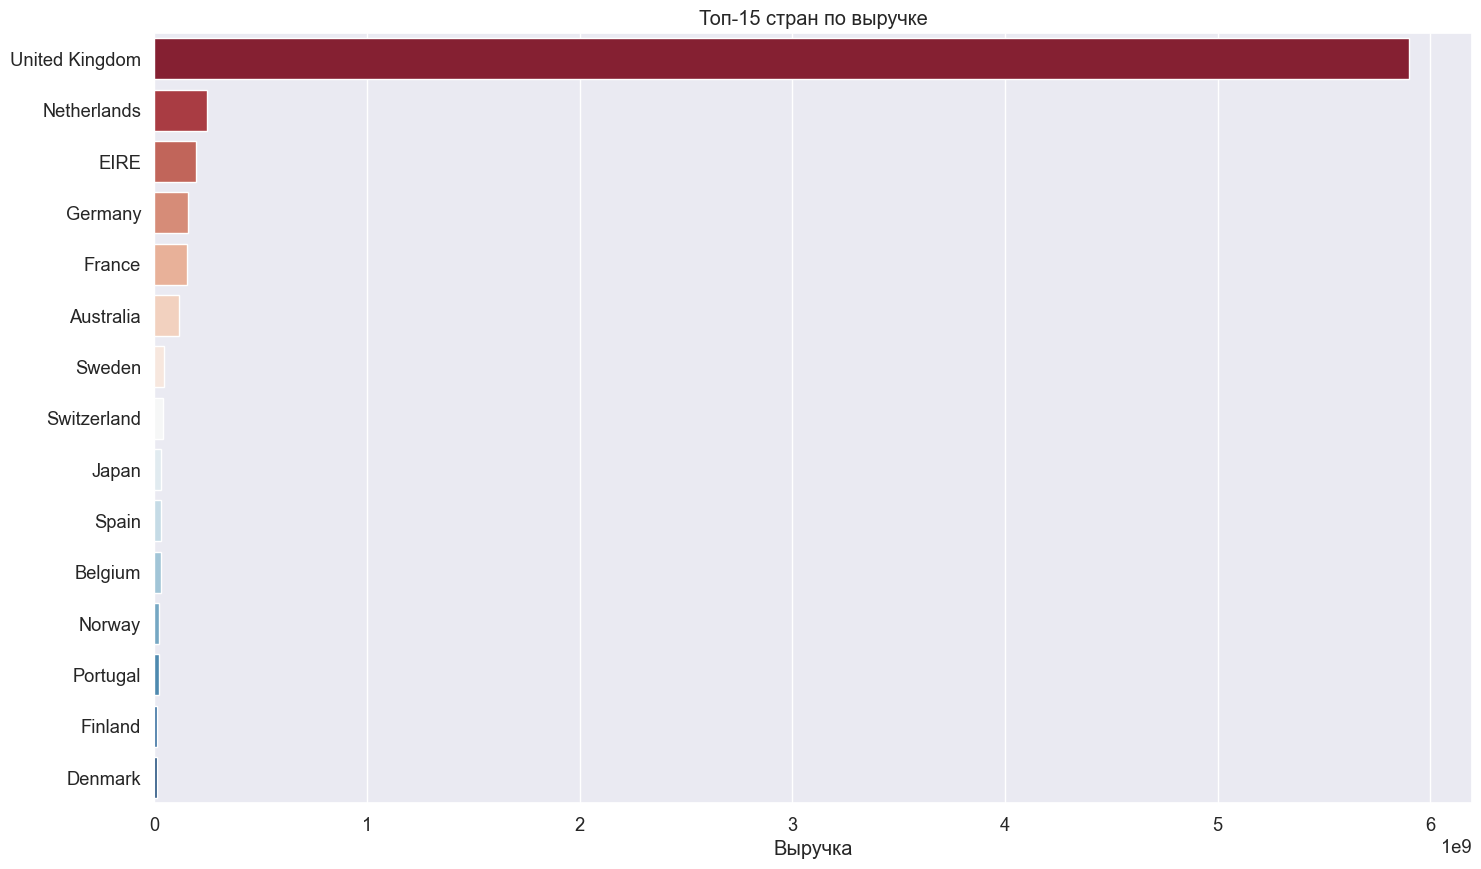

In [52]:
country_group = df.groupby('country')['revenue_per_transaction'].sum()
country_group.head(10)

In [53]:
country_group.sort_values(ascending=False).head(15)

,country,revenue_per_transaction
36,United Kingdom,5 900 285 805
24,Netherlands,246 404 321
10,EIRE,196 228 183
14,Germany,157 065 421
13,France,152 381 338
0,Australia,114 021 979
32,Sweden,46 024 580
33,Switzerland,41 452 725
20,Japan,33 570 883
31,Spain,32 181 356


## Средний чек

Мы посчитали выручку для каждого продукта внутри транзакции. Теперь посчитаем итоговую выручку по всем позициям (продуктам) внутри транзакции и сгруппируем по дате. 

In [ ]:
# Для этого группируем по дате и транзакции, агрегируем сумму по посчитанной выручке за продукт
group_date_tr = (df.groupby()) #type your code here

Осталось перевести дату в месяц, сгруппировать данные по месяцу и для каждого месяца разделить итоговую сумму на количество транзакций.

In [33]:
# Переводим дату в месяц


In [34]:
# Группируем по месяцу, рассчитываем количество уникальных транзакций и сумму по всем транзакциям


In [35]:
# Переводим количество транзакций в нужный формат - astype(int)


In [36]:
# Рассчитываем средний чек. Общую сумму делим на количество


In [37]:
# Представим на графике в динамике по месяцам


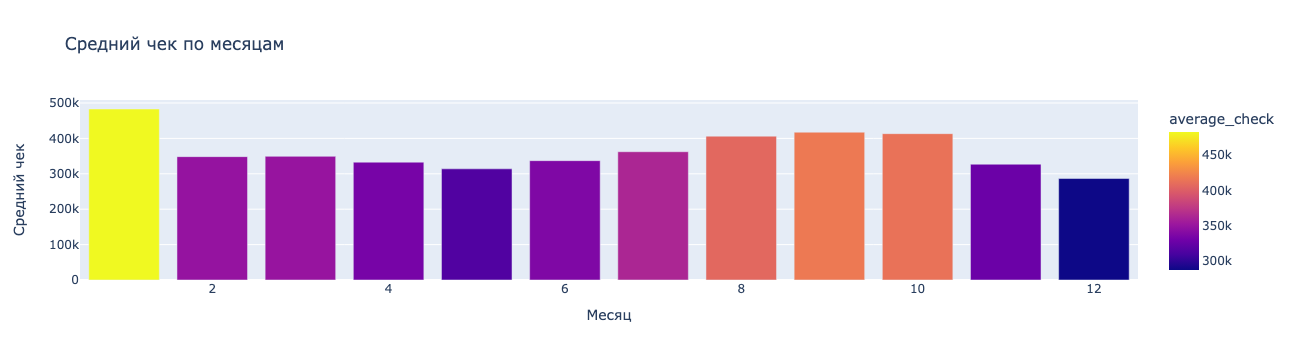

In [66]:
fig = px.bar(month_average_cheack, x='month', y='average_check', color='average_check', 
             title='Средний чек по месяцам')
fig.update_xaxes(title='Месяц')
fig.update_yaxes(title='Средний чек')
fig.show()

Когда был самый высокий средний чек?

## ARPU

Проделываем все то же самое, но с user_id. И в итоге сумму по всем транзакциям делим на количество уникальных пользователей.

В датасете представлены только пользователи совершившие покупку, то есть только платящие. И соответвенно в данном случае ARPU=ARPPU

In [ ]:
# Повторяем шаги с предыдущего задания


Сравним средний чек с ARPU в динамике по месяцам. Для наглядности выведем метрики на одну визуальзацию

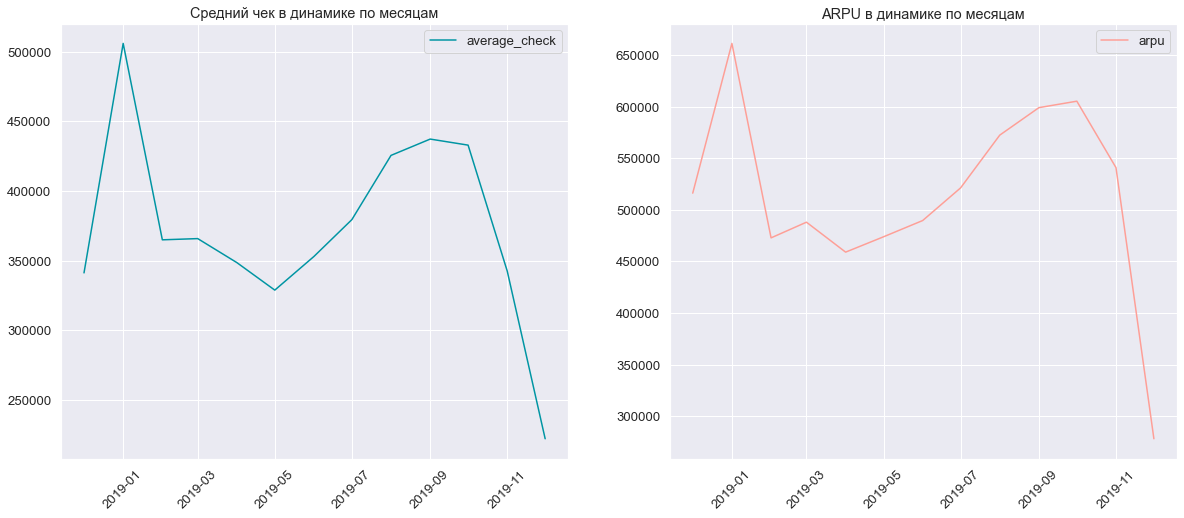

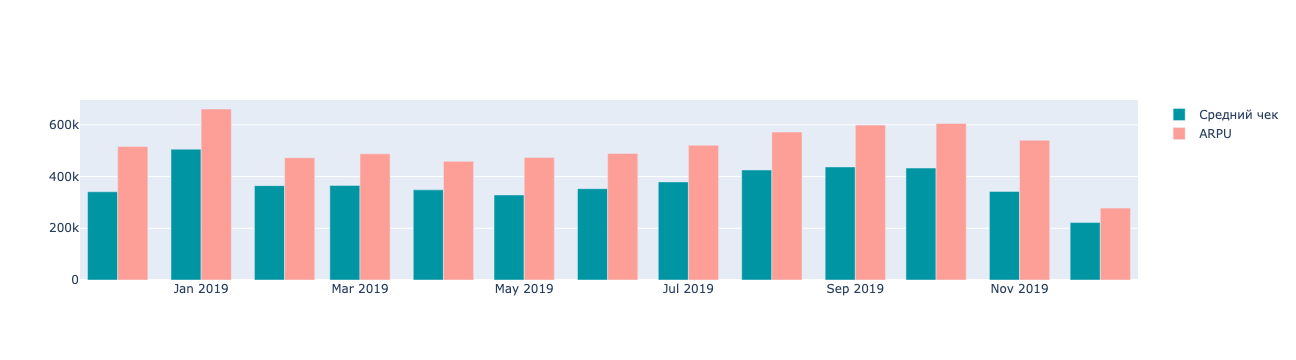

# Какой общий вывод?